# Flights: Arrival Delay Time For Top Destination Cities, 1988 - 2007
## by Brandon Nohara

## Investigation Overview

In this analysis, I wanted to quantify the arrival delay time for flights to top destinations. I also wanted to see if the delay time varied over the years.

## Dataset Overview

The dataset contained flight delay information for approximately 18 million flights from 1988, 1998, and 2007. Attributes included the year, arrival delay time, and destination city. Around 400k rows showed flight lengths with negative minutes, so I removed these as invalid data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_1988 = pd.read_csv('data/1988.csv')
df_1998 = pd.read_csv('data/1998.csv')
df_2007 = pd.read_csv('data/2007.csv')

# Concatenate data for different years
frames = [df_1988, df_1998, df_2007]
df_flights = pd.concat(frames)

# Remove flights with length less than zero minutes
df_flights = df_flights[df_flights.ActualElapsedTime >= 0]
df_flights = df_flights[df_flights.CRSElapsedTime >= 0]

## Distribution of arrival delay time

Most arrival delays were under 60 minutes. However, the delays took a wide range of values, with a few flight delays going up to 2600 minutes (about 43 hours). Plotted on a logarithmic scale, the distribution showed a long tail to the right.

Practically speaking, it's probably not much inconvenience if a flight's arrival is delayed by less than 10 minutes. Therefore I only looked at flights with delays longer than this.

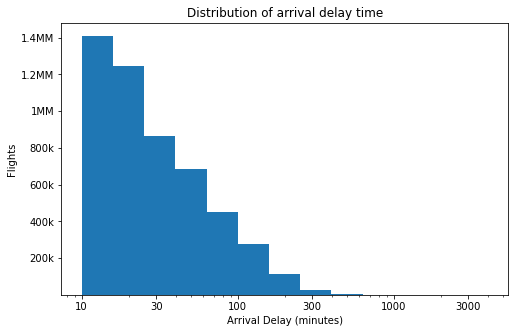

In [4]:
df_delays = df_flights[df_flights.ArrDelay >= 10]

log_binsize = 0.2
bins = 10 ** np.arange(1, np.log10(df_delays['ArrDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data = df_delays, x = 'ArrDelay', bins = bins)
plt.title('Distribution of arrival delay time')
plt.xscale('log')
plt.xticks(ticks=[10, 30, 100, 300, 1000, 3000], labels=[10, 30, 100, 300, 1000, 3000])
plt.xlabel('Arrival Delay (minutes)')
plt.yticks(ticks=[200000, 400000, 600000, 800000, 1000000, 1200000, 1400000], labels=['200k', '400k', '600k', '800k', '1MM', '1.2MM', '1.4MM'])
plt.ylabel('Flights')
plt.show()

## Portion of delayed flights for top destination cities

For the top 20 destination cities by number of flights, the portion of flights with delays varied from 25-40%.

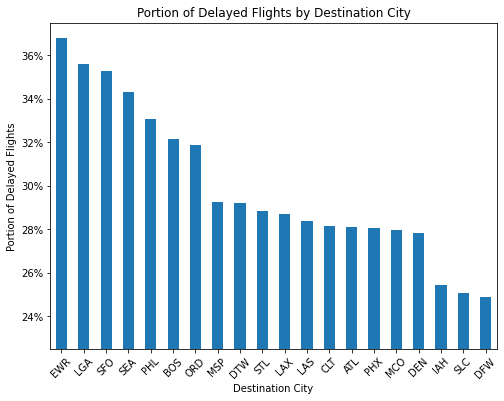

In [5]:
all_dest = df_flights['Dest'].value_counts()[:20]
delay_dest = df_delays['Dest'].value_counts()

delay_portion_dest = delay_dest.divide(all_dest, fill_value=0)
delay_portion_dest.sort_values(ascending=False, inplace=True)
delay_portion_dest.replace(np.inf, np.nan, inplace=True)
delay_portion_dest.dropna(inplace=True)

plt.figure(figsize=[8,6])
delay_portion_dest.plot(kind='bar')
plt.ylim(0.225,0.375)
plt.yticks(ticks=[0.24,0.26,0.28,0.30,0.32,0.34,0.36], labels=['24%','26%','28%','30%','32%','34%','36%'])
plt.ylabel('Portion of Delayed Flights')
plt.xticks(rotation=45)
plt.xlabel('Destination City')
plt.title('Portion of Delayed Flights by Destination City');

## Portion of delayed flights by year

The portion of delayed flights was around 27% in 1988 and 1998, but increased to around 30% in 2007.

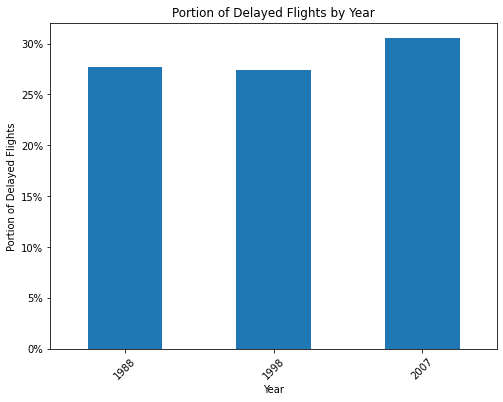

In [6]:
flights = df_flights['Year'].value_counts()
delays = df_delays['Year'].value_counts().sort_index()
delay_portion = delays.divide(flights)

plt.figure(figsize=[8,6])
delay_portion.plot(kind='bar')
plt.yticks(ticks=[0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%'])
plt.ylabel('Portion of Delayed Flights')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Portion of Delayed Flights by Year');

## Arrival delay time of top destination cities

For the top 20 destination cities with the most flights, the median arrival delay time was fairly similar - between 20-30 minutes. Cities with higher median arrival delay time generally had a larger spread of values though. The top 5 cities by median arrival delay time (EWR, SFO, ORD, BOS, LGA) had maximum delay times between 110 and 150 minutes. The remaining cities generally showed a maximum delay time between 80 and 100 minutes.

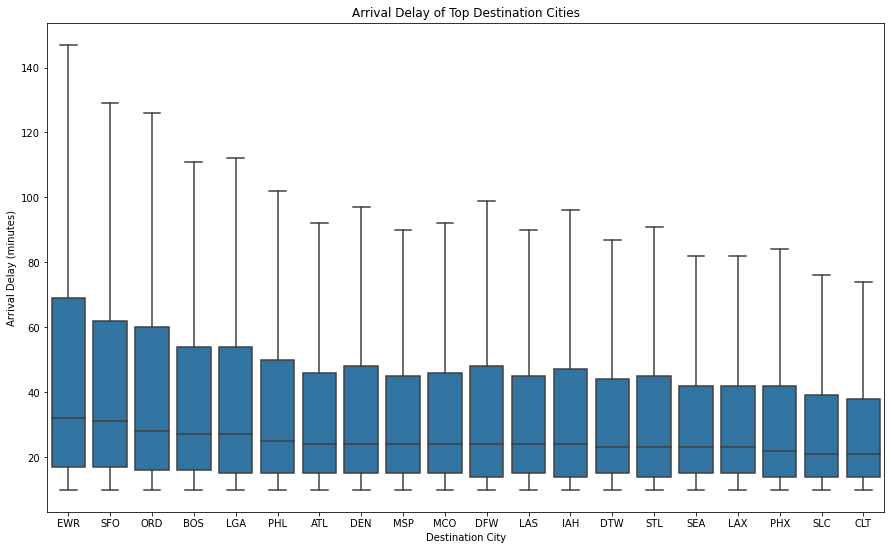

In [7]:
# Filter on flights with delays from one of the top 20 destination cities
cities = pd.Series(df_flights['Dest'].value_counts()[:20].index)
boolean_series = df_delays.Dest.isin(cities)
df_delays_top_dest = df_delays[boolean_series]

# Let's order the boxplot elements by decreasing median of 'ArrDelay'
s_dest_arrdelay = df_delays_top_dest.groupby(by=['Dest'])['ArrDelay'].median()
s_dest_arrdelay.sort_values(ascending=False, inplace=True)
list_dest_arrdelay = s_dest_arrdelay.index.tolist()

plt.figure(figsize=[15,9])
base_color = sb.color_palette()[0]

# The argument showfliers=False removes outliers to make it easier to see the trend
sb.boxplot(data=df_delays_top_dest, x='Dest', y='ArrDelay', showfliers=False, order=list_dest_arrdelay, color=base_color)
plt.ylabel('Arrival Delay (minutes)')
plt.xlabel('Destination City')
plt.title('Arrival Delay of Top Destination Cities');

## Arrival delay time by year

Median arrival delay time increased over the 3 years in the data set, from around 20 minutes in 1988 to 30 minutes in 2007. The maximum delay times also doubled from 60 minutes in 1988 to 120 minutes in 2007.

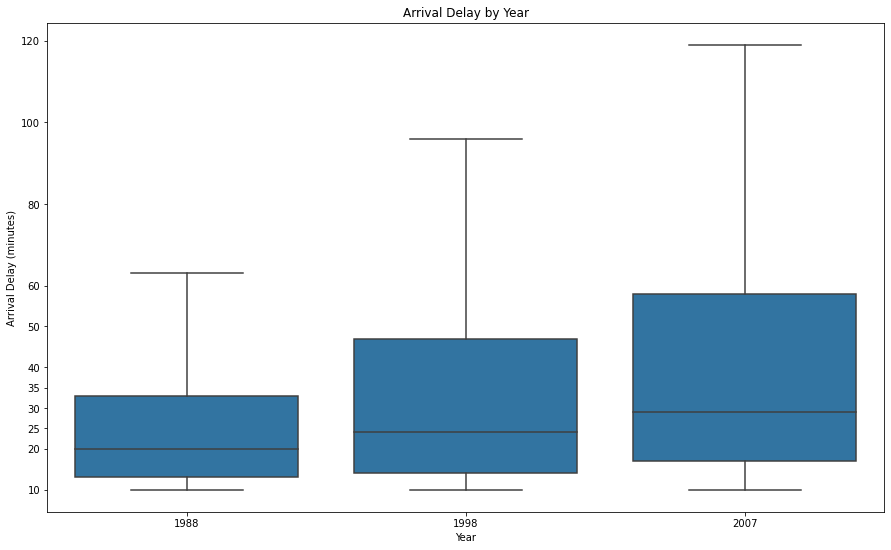

In [8]:
plt.figure(figsize=[15,9])

sb.boxplot(data=df_delays, x='Year', y='ArrDelay', showfliers=False, order=[1988, 1998, 2007], color=base_color)
plt.yticks([10,20,25,30,35,40,50,60,80,100,120])
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay by Year');

## Portion of flights with delays by destination city and year

For 16 of the top 20 cities, the portion of flights with delays increased from 1988 to 2007.

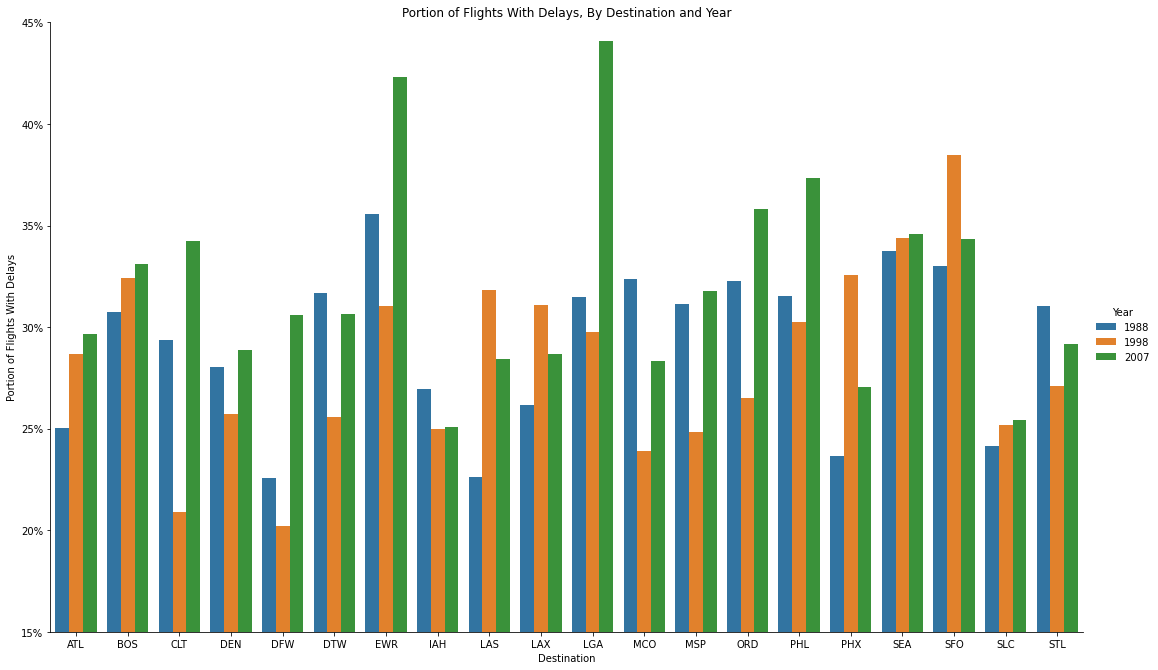

In [9]:
# Filter on flights with delays from one of the top 20 destination cities
# Use the 'cities' variable, which is a series containing the top 20 destination city names

flights_boolean_series = df_flights.Dest.isin(cities)
df_flights_top_dest = df_flights[flights_boolean_series]

s_top_dest = df_flights_top_dest.groupby(by=['Dest', 'Year'])['FlightNum'].count()
s_top_dest_delay = df_delays_top_dest.groupby(by=['Dest', 'Year'])['FlightNum'].count()
s_top_dest_delay_portion = s_top_dest_delay.divide(s_top_dest)
df_top_dest_delay_portion = s_top_dest_delay_portion.to_frame().reset_index()
df_top_dest_delay_portion.rename(columns={'FlightNum':'delay_portion'}, inplace=True)

sb.catplot(data=df_top_dest_delay_portion, kind='bar', x='Dest', y='delay_portion', hue='Year', height=9, aspect=15/9)
plt.title('Portion of Flights With Delays, By Destination and Year')
plt.ylabel('Portion of Flights With Delays')
plt.ylim(0.15, 0.45)
plt.yticks(ticks=[0.15,0.20,0.25,0.30,0.35,0.40,0.45], labels=['15%','20%','25%','30%','35%','40%','45%'])
plt.xlabel('Destination');

## Arrival delay time by destination city and year

In most of our top cities, the length of delay increased over the years. The exception was SFO, which had shorter delays in 2007 compared to 1998.

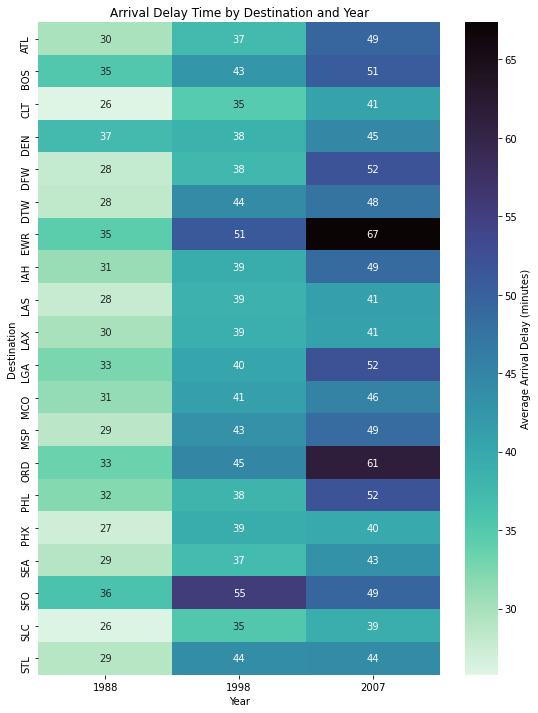

In [10]:
cat_means = df_delays_top_dest.groupby(by=['Dest', 'Year']).mean()['ArrDelay']
cat_means = cat_means.reset_index(name='ArrDelay_avg')
cat_means_pivot = cat_means.pivot(index='Dest', columns='Year', values='ArrDelay_avg')

plt.figure(figsize=[9,12])
sb.heatmap(cat_means_pivot, cmap='mako_r', annot=True, fmt='0.0f', cbar_kws={'label':'Average Arrival Delay (minutes)'})
plt.title('Arrival Delay Time by Destination and Year')
plt.ylabel('Destination');